<a href="https://colab.research.google.com/github/Leigh-Herman/Credit-Card-Fraud-Detection-with-Python/blob/master/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection - A Case Study

The case study is to implement a system that detects fraudulent purchases so that customers are not charged for something they did not purchase.

Starting with a dataset containing transaction information, this program will differentiate between fraudulent and true transactions.

The main way that this will work is through building Classification to predict discrete variables.

## Steps Involved

1. Importing the required packages into this python notebook environment.
2. Import a dataset.
3. Processing the data to the needs of the program and exploring data analysis - most likely using statistical inference
4. Building different types of data classification models
5. Evaluating the created classification models using relevant evaluation metrics

This Classification technique is one way to build a Machine Learning program. Remember the AWS training module



# Importing Packages

Primary packages are:
1. Pandas - data work
2. Numpy - manipulate arrays
3. scikit-learn - data split, building and evaluating the classification models
4. xgboost - provides the xgboost classifier model algorithm

In [48]:
import pandas as pd             # data processing
import numpy as np              # working with arrays
import matplotlib.pyplot as plt # visualization

from termcolor import colored as cl # text customizations - will add more on this when implemented
import itertools                    # advanced tools - will add more on this when implemented

# scikit-learn packages
from sklearn.preprocessing import StandardScaler      # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier       # decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier    # KNN Algorithm - a part of StackSkills learning module yet to be completed
from sklearn.linear_model import LogisticRegression   # logistic regression algorithm
from sklearn.svm import SVC                           # SVM algorithm - more research into this needed
from sklearn.ensemble import RandomForestClassifier   # Random forest algorithm

from xgboost import XGBClassifier                     # xgboost algorithm - more research into this needed

from sklearn.metrics import confusion_matrix          # evaluation metric
from sklearn.metrics import accuracy_score            # evaluation metric
from sklearn.metrics import f1_score                  # evaluation metric

# Importing Data

The data set comes from the Kaggle Credit Card Fraud Detection dataset. I downloaded a Credit Card Fraud Detection data set that is from 2013 European card holders.

Information in the dataset indicates that there are 492 frauds out of 284,807 transactions. 

Let's hope for the same outcome!

When using the Google Colab environment, to load files to use in code, we must first mount the google drive.

In [49]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Then we can list all the files available from the mount

In [50]:
!ls "/content/drive/My Drive/Colab Notebooks/Credit Card Fraud Detection"

 archive.zip	 'Credit Card Fraud Detection.ipynb'
 creditcard.csv   Credit_card_fraud_detection.py


Now we can read in the data set csv file and remove the Time column since it will not be useful for this program. 

The remaining features will be 'Amount' which contains the total amount of money being transacted and the 'Class' feature which contains whether the transaction is fraud or not.

In [51]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Credit Card Fraud Detection/creditcard.csv")
df.drop('Time', axis = 1, inplace = True)

print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

# Data Processing and Exploatory Data Analysis (EDA)

We can look at how many fraud cases and non-fraud cases there are in the data set. We can calculate some percentages of fraud cases in the overall record.

## Count and Percentages

In [52]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count * 100, 2)

In [53]:
print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of non-fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------------
Total number of cases are 284807
Number of non-fraud cases are 284315
Number of non-fraud cases are 492
Percentage of fraud cases is 0.17
--------------------------------------------------


## Describe Method
Next let's form a statistical view of the fraud and non-fraud cases suing the 'describe' method

In [54]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

In [55]:
print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('--------------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------------', attrs = ['bold']))

CASE AMOUNT STATISTICS
--------------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------------


The statistical description for the 'Amount' variable is highly variable compared to the other variables. It can be normalized using the 'StandardScaler' method

In [56]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(df['Amount'].head(10), attrs = ['bold']))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


# Data Split

We are going to define an independent variable (X) and the dependent variable (Y).

USing these variables we can split the data into a training set and a testing set. The testing set will be sued for modeling and evaluating. We can split the data using the 'train_tets_split' algorithm

Let us first define the variables

In [59]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

Set up as test and trainging variables

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [62]:
print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:10])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:10])

X_train samples :  [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489556  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]
X_test samples :  [[-0.32333357  1.05745525 -0.04834115 -0.60720431  1.25982115 -0.09176072
   1.1591015  -0.12433461 -0.17463954 -1.64440065 -1.11886302  0.20264731
   1.14596495 -1.80235956 -0.24717793 -0.06094535  0.84660574  0.37945439
   0.84726224  0.18640942 -0.20709827 -0.43389027 -0.26161328 -0.04665061
   0.2115123   0.00829721  0.10849443  0.16113917 -0.19330595]]
y_train samples :  [0 0 0 0 0 0 0 0 0 0]
y_test samples :  [0 0 0 0 0 0 0 0 0 0]


# Modeling

We will build six different classification models.
1. Decision Tree
2. K-Nearest Neighbours (KNN)
3. Logistical Regression
4. Support Vector Machine (SVM)
5. Random Forest
6. XGBoost

*********More research has to be done in each of these methods*****************

Each can be built easily using the scikit-learn package. Only the XGBoost model must use the xgboost package.

## Decision Tree

This model uses the 'DecisionTreeClassifier' algorithm to build the model. 

The model has been split 4 times using 'max_depth' with the 'criterion' being set as 'entropy' which is similar to 'max_depth' but determines when the tree stops splitting.

Finally, the data is fitted and the predicted values is stored into 'tree_yhat' variable. 

In [64]:
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

## KNN

This model is built using the 'KNearestNeighbor' algorithm and the 'n_neighbors' is set to 5. The value of 'n_neighbors' is randomly sleected but can be chosen optomistically thorugh iterating a range of values followed by fitting and storing predicted values into the 'knn_yhat' variable.

In [65]:
n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

## Logistic Regression

This is kept simple using the 'LogisticRegression' algorithm. The data is fitted and then we store the predicted variables in the 'lr_yhat' variable. 

In [67]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

## Support Vector Machine

The SVC algorithm is used which is used here with the default kernal 'rbf'. After that the predicted values are stored in 'svm_yhat' after the data is fitted.

In [68]:
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

## Random Forest

This model is built using the 'RandomForestClassifier' algorithm and the 'max_deoth' is set to 4 just like the decision tree splitting. 

Fitting and storing the predicted values into 'rf_yhat'.

The main decision between decision tree and random forest is that, decision tree uses the entire data set to construct a single model while random forest uses randomly slected features to construct multiple models. 

In [69]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

## XGBoost

This model uses the 'XGBClassifier' algorithm from the xgboost package. The 'max_depth' is again set to 4 and after the data is fitted, the predicted values are stored in 'xgb_yhat'.

In [71]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

# Evaluation

We evaluate each of our models using evaluation metrics provided by the scikit-learn package with the goal of finding the best model for our case study.

The evaluation metrics are
1. Accuracy Score
2. f1 score metric
3. Confusion matrix

## Accuracy Score

A basic evaluation metric which is widely used to evaluate classification models. The accuracy score is calculated by dividing the number of predictions made by the model by the total number of predictions and we can also multiply by 100 to make this a percentage.

Let's now find and express the accuracy score for each model using the 'accuracy_score' method provided in scikit-learn.

In [74]:
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('----------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is : {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('----------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy of the KNN model is : {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('----------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy of the Logistic Regression is : {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold'], color='red'))
print(cl('----------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy of the SVM Model is : {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('----------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy of the Random Forest model is : {}'.format(accuracy_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('----------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy of the XGBoost model is : {}'.format(accuracy_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('----------------------------------------------------------------------', attrs = ['bold']))

ACCURACY SCORE
----------------------------------------------------------------------
Accuracy score of the Decision Tree model is : 0.9993679997191109
----------------------------------------------------------------------
Accuracy of the KNN model is : 0.9995259997893332
----------------------------------------------------------------------
Accuracy of the Logistic Regression is : 0.9991924440855307
----------------------------------------------------------------------
Accuracy of the SVM Model is : 0.9993153330290369
----------------------------------------------------------------------
Accuracy of the Random Forest model is : 0.9993153330290369
----------------------------------------------------------------------
Accuracy of the XGBoost model is : 0.9994733330992591
----------------------------------------------------------------------


We can see and have highlighted the worst and best accuracy models.

## F1 Score Metric

The F1 or F-score metric is the most popular metric to evaluate classification models. It is simply a harmonic mean of the model's precision and recall. It is calculated by dividing the product of the model's precision and recall by the value obtained by adding the model's precision and recall and then finally multiplying the result by two.

In [75]:
print(cl('F1 Score', attrs = ['bold']))
print(cl('----------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 Score of the Decision Tree model is : {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('----------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 Score of the KNN model is : {}'.format(f1_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('----------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 Score of the Logistic Regression is : {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold'], color='red'))
print(cl('----------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 Score of the SVM Model is : {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('----------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 Score of the Random Forest model is : {}'.format(f1_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('----------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 Score of the XGBoost model is : {}'.format(f1_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('----------------------------------------------------------------------', attrs = ['bold']))

F1 Score
----------------------------------------------------------------------
F1 Score of the Decision Tree model is : 0.8105263157894738
----------------------------------------------------------------------
F1 Score of the KNN model is : 0.8571428571428572
----------------------------------------------------------------------
F1 Score of the Logistic Regression is : 0.7356321839080459
----------------------------------------------------------------------
F1 Score of the SVM Model is : 0.7771428571428572
----------------------------------------------------------------------
F1 Score of the Random Forest model is : 0.7796610169491525
----------------------------------------------------------------------
F1 Score of the XGBoost model is : 0.8421052631578948
----------------------------------------------------------------------


We have highlighted the worst and best f1 scores which are the same results as the Accuracy Score.

## Confusion Matrix

A confusion matrix is a visualization of a classification that shows how well the model has predicted the outcomes compared to the original outcomes.

The predicted outcomes are stored in a variable which is converted into a correlation table. Using this correlation table, the confusion matrix is plotted as a heatmap.

To better understand this method, we will construct it from scratch.

### Defining the plot function

In [116]:
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
  title = 'Confusion Matrix of {}'.format(title)

  if normalize:
    cm = cm.astype(float) / cm.sum(axis = 1)[:, np.newaxis]

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i, j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')

### Computer the confusion matrix for each of the models

In [117]:
tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1])  # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1])  # K-Nearest Neighbour
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1])  # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1])  # Support Vector MAchine
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1])  # Random Forest
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1])  # XGBoost

### Plot the confusion matrix

Plot the confustion matrix for each model

In [118]:
plt.rcParams['figure.figsize'] = (6, 6)

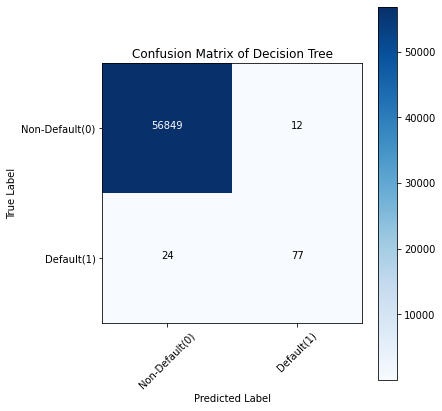

In [123]:
# Decision Tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, classes = ['Non-Default(0)', 'Default(1)'], normalize = False, title = 'Decision Tree')

plt.savefig('tree_cm_plot.png')
plt.show()

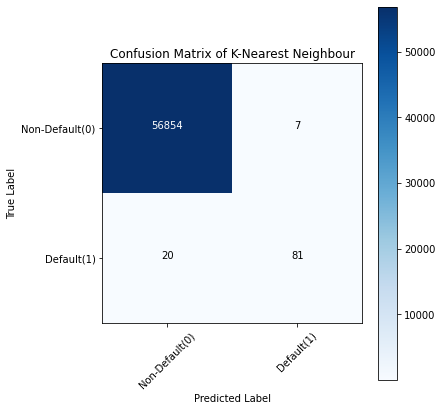

In [124]:
# K-Nearest Neighbour

knn_cm_plot = plot_confusion_matrix(knn_matrix, classes = ['Non-Default(0)', 'Default(1)'], normalize = False, title = 'K-Nearest Neighbour')

plt.savefig('knn_cm_plot.png')
plt.show()

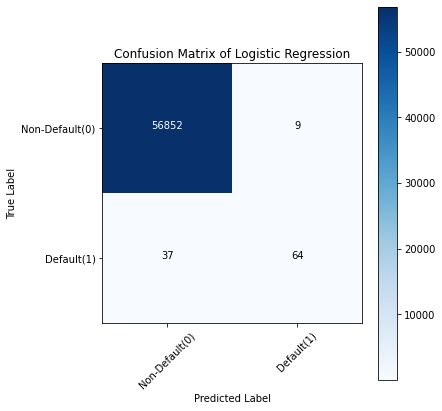

In [125]:
# Logistic Regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, classes = ['Non-Default(0)', 'Default(1)'], normalize = False, title = 'Logistic Regression')

plt.savefig('lr_cm_plot.png')
plt.show()

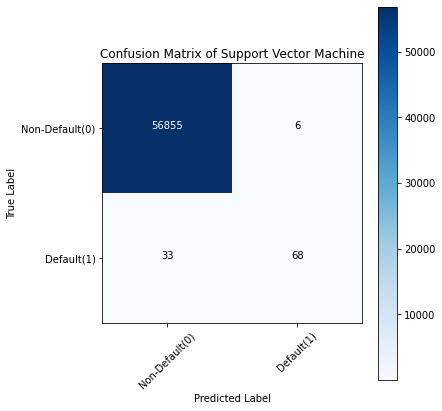

In [126]:
# Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix, classes = ['Non-Default(0)', 'Default(1)'], normalize = False, title = 'Support Vector Machine')

plt.savefig('svm_cm_plot.png')
plt.show()

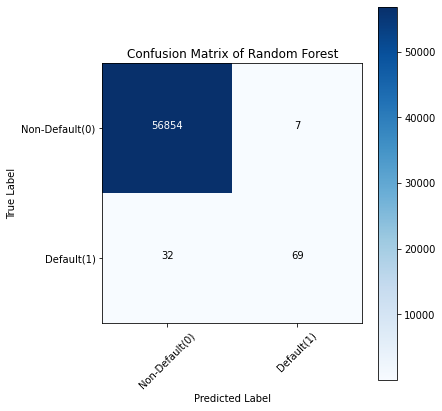

In [127]:
# Random Forest

rf_cm_plot = plot_confusion_matrix(rf_matrix, classes = ['Non-Default(0)', 'Default(1)'], normalize = False, title = 'Random Forest')

plt.savefig('rf_cm_plot.png')
plt.show()

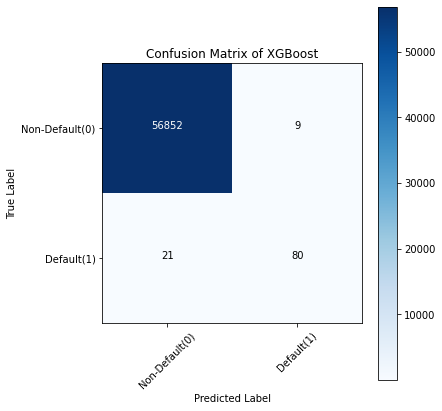

In [128]:
# XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, classes = ['Non-Default(0)', 'Default(1)'], normalize = False, title = 'XGBoost')

plt.savefig('xgb_cm_plot.png')
plt.show()

### Understanding the Confusion Matrix.

Let's try not to make this confusing. I'll be here all night, tip your waiter.

Looking at the XGBoost model as an example, we first look at the first row. The first row is for transactions whose actual fraud value in the test set is 0. As we calculated, the fraud value of 56861 of the transactions is 0 and out of these transactions, the classification method predicted 56852 of them as 0 and 9 of them as 1. That means that for 86852 non-fraud transactions, the actual churn value was 0 in the test set and the classifier also correctly predicted those as 0. So this model worked quite well.

Now to interpret the second row. There were 101 transactions whose fraud value were 1. The classifier correctly predicted 80 of them as 1 and 21 of them are to be considered as error of the model.

In this way we can say that the error was the lowest for KNN followed by the XGBoost method. So we would want to use the XGBoost model versus not using the Logistic Regression method which had the worst error of 37.

# Conclusion

Well, after following the program created by Nikhil Adithyan, github.com/Nikhil-Adithyan, we have successfully built a famous financial project with six different classification models, evaluated the models with evaluation metrics, and chosen which is the best model to use, KNN which had the best Accuracy Score, F1 Score, and lowest error expressed in the Confusion Matrix heatmap.

Next would be to find more models, access Kaggle for other data sets, increase my Machine Learning experience and be pleasently surprised that all those statistic courses might actually be uselful!!